# Understanding Softmax Function

---

## What is Softmax?

The **Softmax function** is a mathematical function that converts a vector of raw scores (**logits**) into **probabilities**.  
These probabilities represent the **likelihood of each class** being the correct one.

It is commonly used in the **output layer of classification neural networks**, especially for **multi-class classification** problems.

---

## Mathematical Definition

Given a vector of scores (logits):

$$
z = [z_1, z_2, \dots, z_n]
$$

The softmax of the $i^{th}$ element is calculated as:

$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{n} e^{z_j}}
$$

This ensures that:
- All outputs are **positive**
- All outputs **sum to 1**

---

## Intuition Behind Softmax

- Each element is **exponentiated**, so **larger scores dominate** more.
- Then, each exponentiated score is **normalized** by dividing by the sum of all exponentials.
- This transformation **magnifies differences** between the scores.
- The result is a **probability distribution**.

---

## Visual Analogy

Imagine logits as **votes for each class**.  
Softmax turns those votes into **percentages**.

A higher vote becomes a higher probability, but the **total always sums to 1**.

---

## Example

Let’s say the model outputs logits:

$$
z = [2.0, 1.0, 0.1]
$$

Compute exponentials:

$$
e^z = [e^{2.0}, e^{1.0}, e^{0.1}] = [7.39, 2.71, 1.11]
$$

Sum:

$$
\sum e^z = 7.39 + 2.71 + 1.11 = 11.21
$$

Softmax probabilities:

$$
\text{softmax}(z) = \left[ \frac{7.39}{11.21}, \frac{2.71}{11.21}, \frac{1.11}{11.21} \right] = [0.659, 0.242, 0.099]
$$

---

## Why Use Softmax?

- Converts **arbitrary real values** into **interpretable probabilities**
- Ideal for **multi-class classification** (where each input belongs to exactly one class)
- Enables the use of **Cross-Entropy Loss**

---

## Properties

- Output is a **probability distribution** (each value between 0 and 1, sum = 1)
- **Sensitive to relative differences** in the logits
- **Exponentially amplifies** the differences in input logits


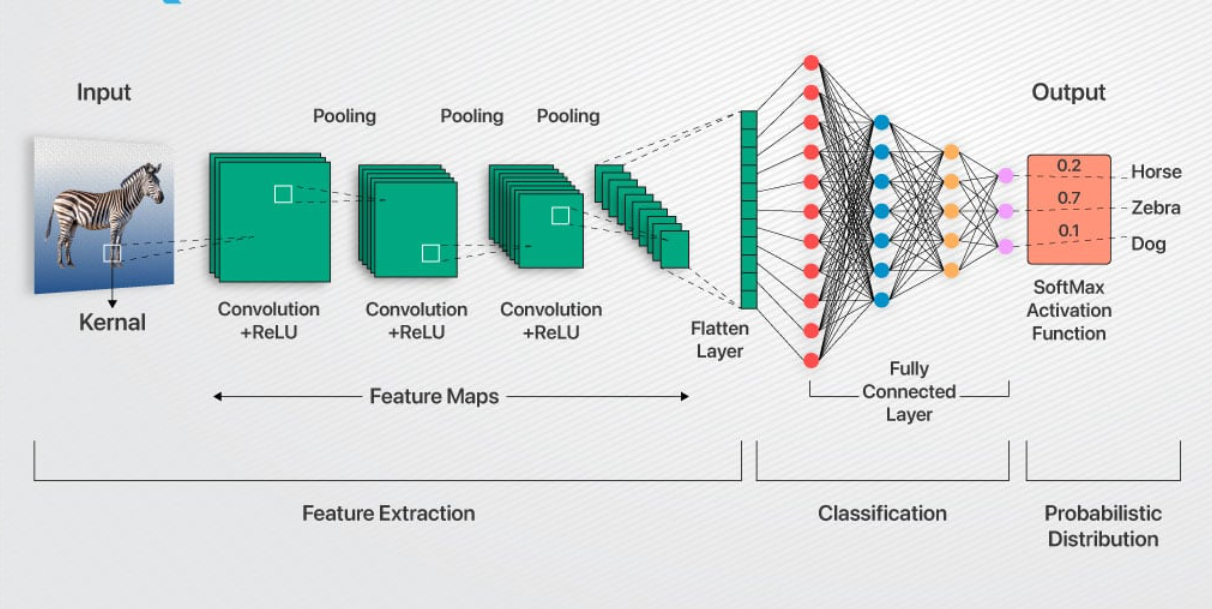

# 1. Motivation for CNNs

### 🔹 Problem with Fully Connected Networks:
- Too many parameters for image data  
  (e.g., $32 \times 32 \times 3 = 3,072$ inputs for CIFAR-10)
- Lose spatial structure (height/width relationships)

### 🔹 CNN to the Rescue:
- Captures **local patterns**
- Requires **fewer parameters**
- **Preserves** spatial relationships in images

---

# 2. CNN Architecture Overview

A typical CNN has the following components:

- **Convolutional Layer**
- **Activation Function (ReLU)**
- **Pooling Layer** (Max Pooling or Average Pooling)
- *(Optional)*: **Batch Normalization**, **Dropout**
- **Fully Connected Layer**
- **Softmax/Output Layer**

---

# 3. Convolution Operation

### 🔹 Terminology:
- **Kernel/Filter**: Small matrix (e.g., $3 \times 3$ or $5 \times 5$) that slides across the input image
- **Stride**: The number of pixels the kernel moves each step
- **Padding**: Adding border pixels to maintain spatial size

### 🔹 Convolution Formula:
$$
\text{Output}(i, j) = \sum_{m=0}^{k-1} \sum_{n=0}^{k-1} \text{Input}(i+m, j+n) \cdot \text{Kernel}(m, n)
$$

### 🔹 Output Size Formula:
$$
\text{Output Size} = \left( \frac{W - K + 2P}{S} + 1 \right)
$$

Where:  
- $W$ = Input width (or height)  
- $K$ = Kernel size  
- $P$ = Padding  
- $S$ = Stride  

---

# 4. Activation Function

Most commonly used activation in CNNs is **ReLU** (Rectified Linear Unit):

$$
f(x) = \max(0, x)
$$

It introduces **non-linearity** to the model and helps to learn complex patterns.

---

# 5. Pooling Layer

### 🔹 Purpose:
- Reduces spatial dimensions (height and width)
- Retains important features
- Adds **translation invariance**

### 🔹 Types of Pooling:
- **Max Pooling**: Takes the maximum value from a patch
- **Average Pooling**: Takes the average value from a patch

Example: A $2 \times 2$ max pooling on a $4 \times 4$ feature map reduces it to $2 \times 2$

---

# 6. CNN Architecture for CIFAR-10

Input (32x32x3 RGB Image)  
↓  
Conv2D (3x3 kernel, 32 filters, padding=1)  
↓  
ReLU Activation  
↓  
MaxPooling2D (2x2)  
↓  
Conv2D (3x3 kernel, 64 filters, padding=1)  
↓  
ReLU Activation  
↓  
MaxPooling2D (2x2)  
↓  
Flatten  
↓  
Fully Connected Layer (128 units)  
↓  
ReLU Activation  
↓  
Fully Connected Layer (10 units - for 10 classes)  
↓  
Softmax (for class probabilities)

---

# 7. Training a CNN

### 🔹 Key Components:
- **Loss Function**: Use `CrossEntropyLoss` for classification
- **Optimizer**: Use `Adam` or `SGD` for training
- **Metrics to Track**:
  - Training Loss
  - Validation Loss
  - Accuracy

### 🔹 Training Steps:
1. Forward pass  
2. Compute loss  
3. Backward pass (compute gradients)  
4. Update weights with optimizer  

---

# 8. Why CNNs Work Well on Images

- Capture **spatial hierarchies** (edges → shapes → objects)
- **Weight sharing** reduces the number of parameters
- **Local connectivity** makes the network more efficient
- Natural fit for **grid-like data** (e.g., images, videos)
